### Task-03

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [5]:
# Load the dataset
file_path = "C:/Users/DELL/Documents/Task-3/drug200.csv"  
data = pd.read_csv(file_path)
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [6]:
# Preprocessing: Encoding categorical variables
le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_cholesterol = LabelEncoder()
le_drug = LabelEncoder()

data['Sex'] = le_sex.fit_transform(data['Sex'])
data['BP'] = le_bp.fit_transform(data['BP'])
data['Cholesterol'] = le_cholesterol.fit_transform(data['Cholesterol'])
data['Drug'] = le_drug.fit_transform(data['Drug'])

In [7]:
# Splitting the data into features and target variable
X = data.drop('Drug', axis=1)
y = data['Drug']

In [8]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Building the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
# Making predictions
y_pred = clf.predict(X_test)

In [11]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [12]:
print("Accuracy:", accuracy)
print("\nClassification Report:\n", class_report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Confusion Matrix:
 [[ 7  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 26]]


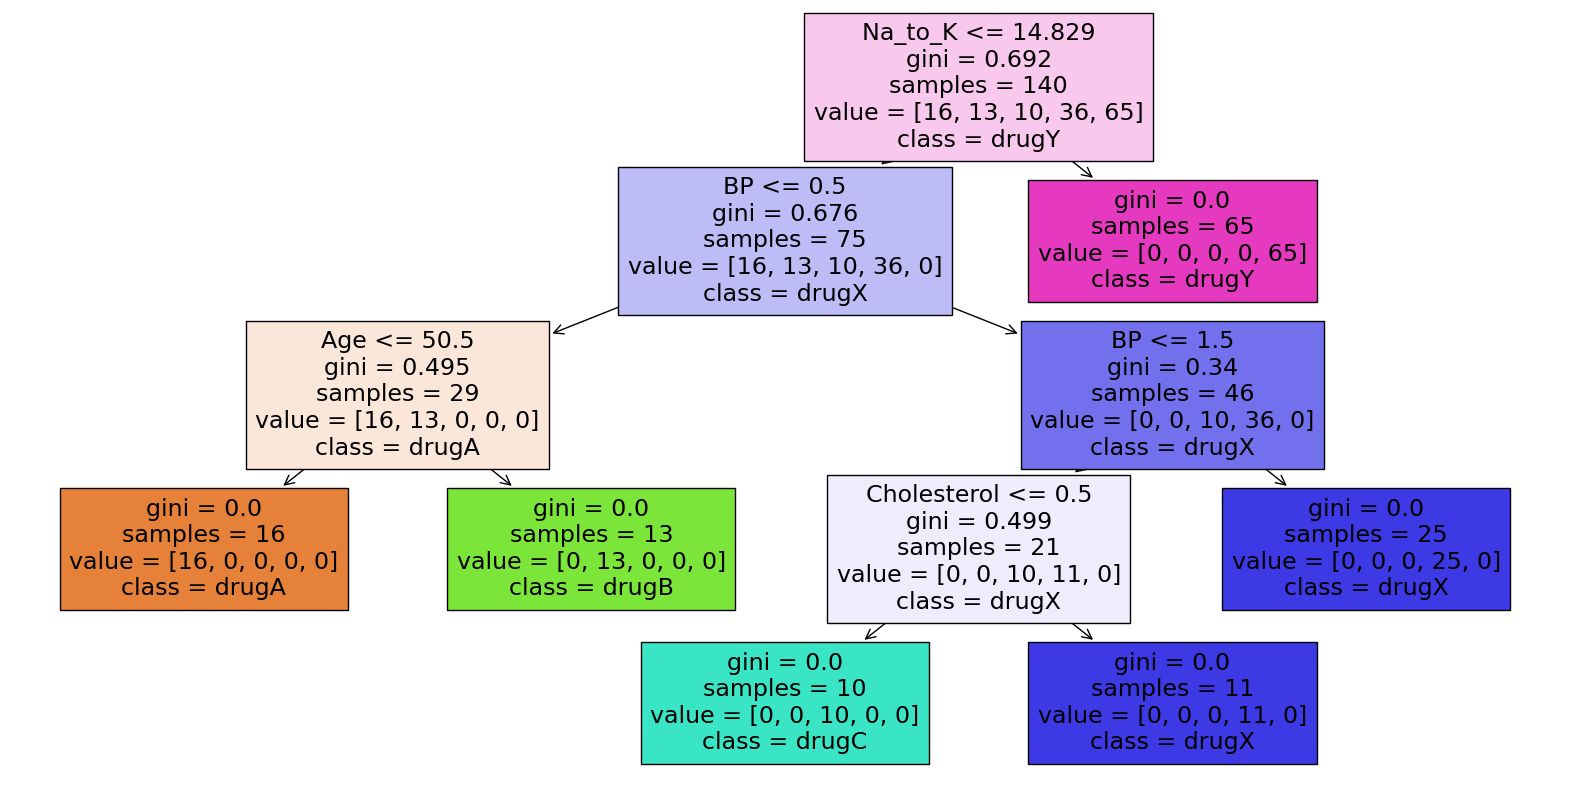

In [13]:
# Visualizing the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=le_drug.classes_)
plt.show()